# ビットコイン積立シミュレーション

In [1]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 引数情報
symbol = "BTC-JPY"  # 仮想通貨の銘柄を指定
period = "max"             # データ取得範囲を指定（全て：max, 1年：1y, １月：1mo）
purchase = 1000      # １日あたりの購入金額 

# データ取得
ticker = yfinance.Ticker(symbol)
history   = ticker.history(period=period)


# 成績

In [2]:
current_price = history.Close[-1]
amount = purchase / history.Close

total_amount = sum(amount)
total_purchase = purchase * len(amount)
unit_price = total_purchase / total_amount
valuation = total_amount * current_price
profit = valuation - total_purchase

print("購入数:", round(total_amount, 5), "BTC")
print("単価:", int(unit_price), "円")
print("購入価額:", int(total_purchase), "円")
print("評価額:", int(valuation), "円")
print("利益:", int(profit), "円")
print("利益率:", round(profit/total_purchase*100.0, 5), "%")

購入数: 23.55291 BTC
単価: 138666 円
購入価額: 3266000 円
評価額: 89877047 円
利益: 86611047 円
利益率: 2651.8998 %


# チャート用データ作成

In [3]:
close = history.Close

data = pd.DataFrame(columns=['Price','Amount', 'Purchase', 'UnitPrice', 'Valuation', 'Profit'])
total_amount = 0
total_purchase = 0
for i in range(len(amount)):
    total_amount += amount[i]
    total_purchase += purchase
    valuation = total_amount * close[i]
    data.loc[close.index[i]] = [close[i], total_amount, total_purchase, total_purchase/total_amount, valuation, valuation - total_purchase]

data = data.resample('M').first()


# ビットコイン価格の推移

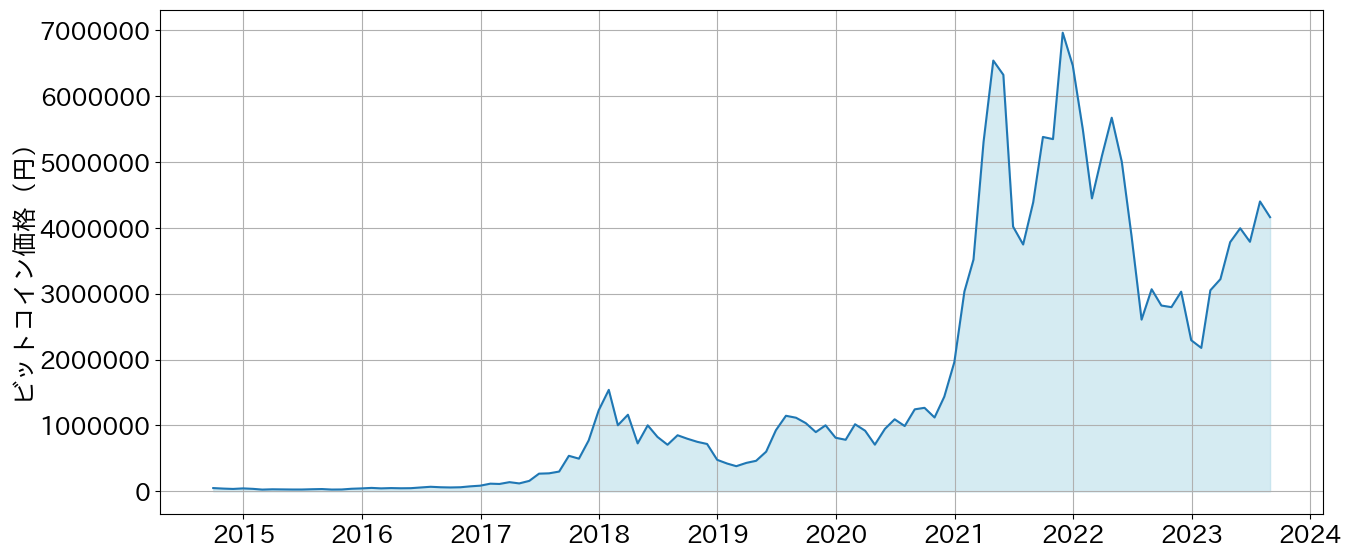

In [4]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(211)
fig.subplots_adjust(top=0.85)
ax.grid()
ax.set_ylabel("ビットコイン価格（円）", fontsize=18)
plt.ticklabel_format(style='plain')
plt.tick_params(labelsize=18)
ax.fill_between(data.Price.index, data.Price, color="lightblue", alpha=0.5)
plt.plot(data.Price)
plt.show()

# 購入量の推移

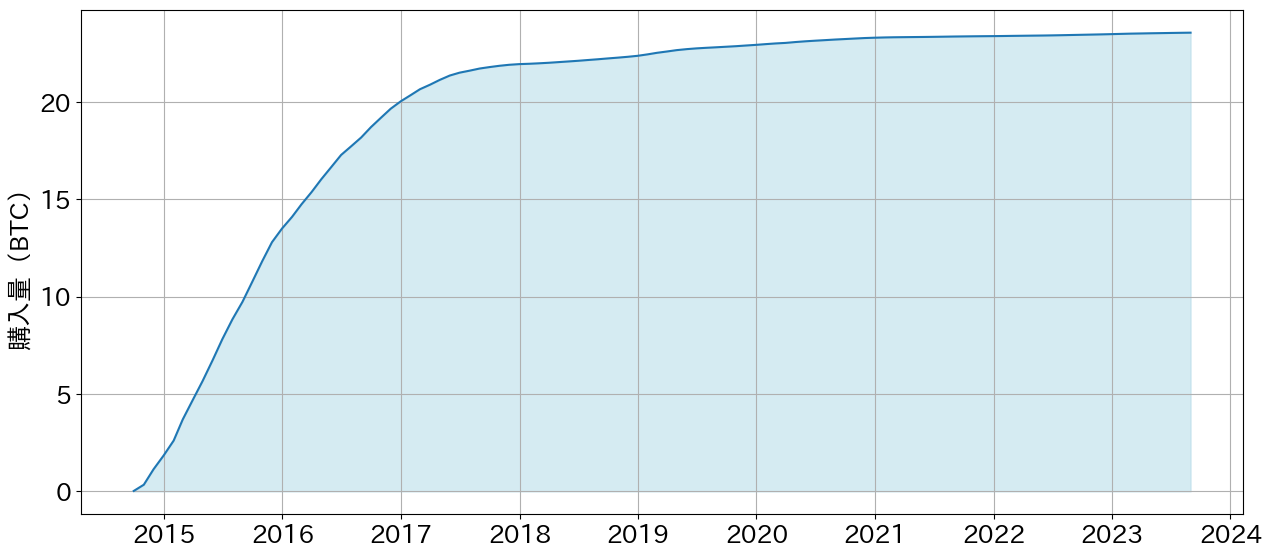

In [5]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(211)
fig.subplots_adjust(top=0.85)
ax.grid()
#ax.set_yticks(np.arange(-1000000, 10000000, 1000000))
ax.set_ylabel("購入量（BTC）", fontsize=18)
plt.ticklabel_format(style='plain')
plt.tick_params(labelsize=18)
ax.fill_between(data.Amount.index, data.Amount, color="lightblue", alpha=0.5)
plt.plot(data.Amount)
plt.show()

# 評価損益の推移

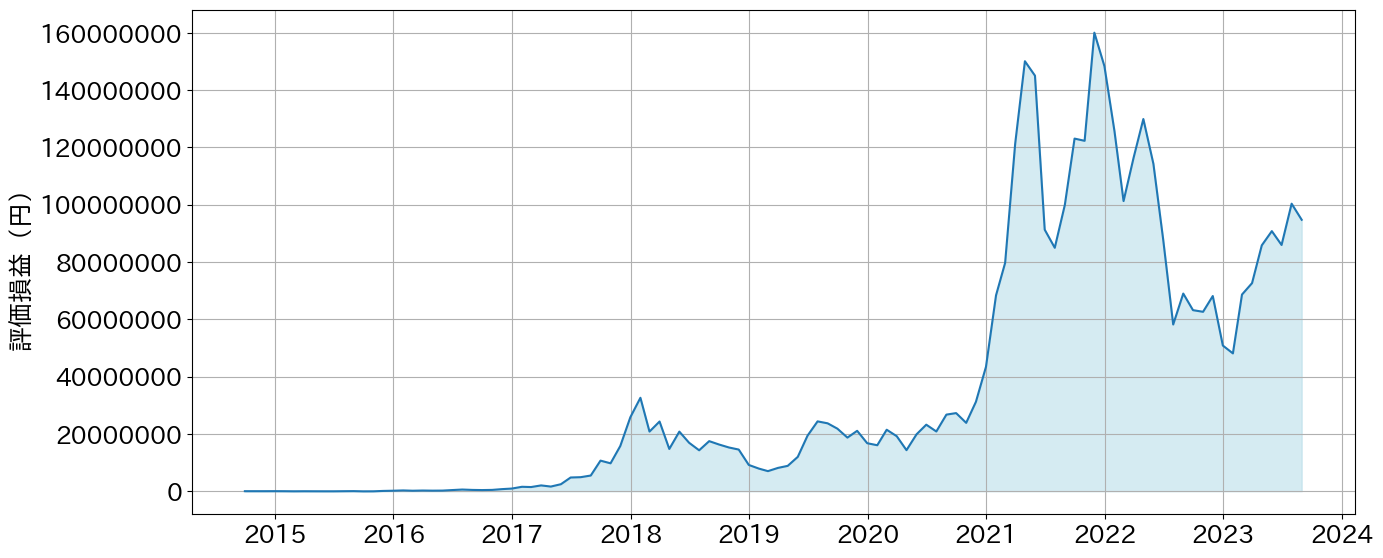

In [6]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(211)
fig.subplots_adjust(top=0.85)
ax.grid()
#ax.set_yticks(np.arange(-1000000, 10000000, 1000000))
ax.set_ylabel("評価損益（円）", fontsize=18)
plt.ticklabel_format(style='plain')
plt.tick_params(labelsize=18)
ax.fill_between(data.Profit.index, data.Profit, color="lightblue", alpha=0.5)
plt.plot(data.Profit)
plt.show()

# 評価額の推移

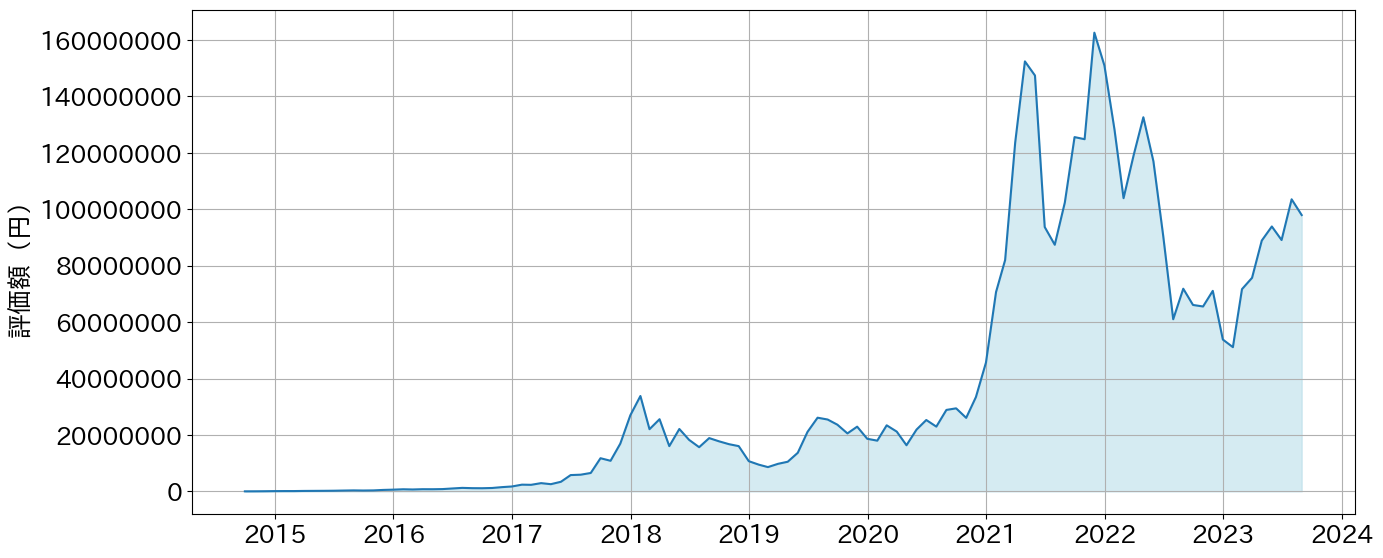

In [7]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(211)
fig.subplots_adjust(top=0.85)
ax.grid()
#ax.set_yticks(np.arange(-1000000, 10000000, 1000000))
ax.set_ylabel("評価額（円）", fontsize=18)
plt.ticklabel_format(style='plain')
plt.tick_params(labelsize=18)
ax.fill_between(data.Valuation.index, data.Valuation, color="lightblue", alpha=0.5)
plt.plot(data.Valuation)
plt.show()

# 購入価額の推移

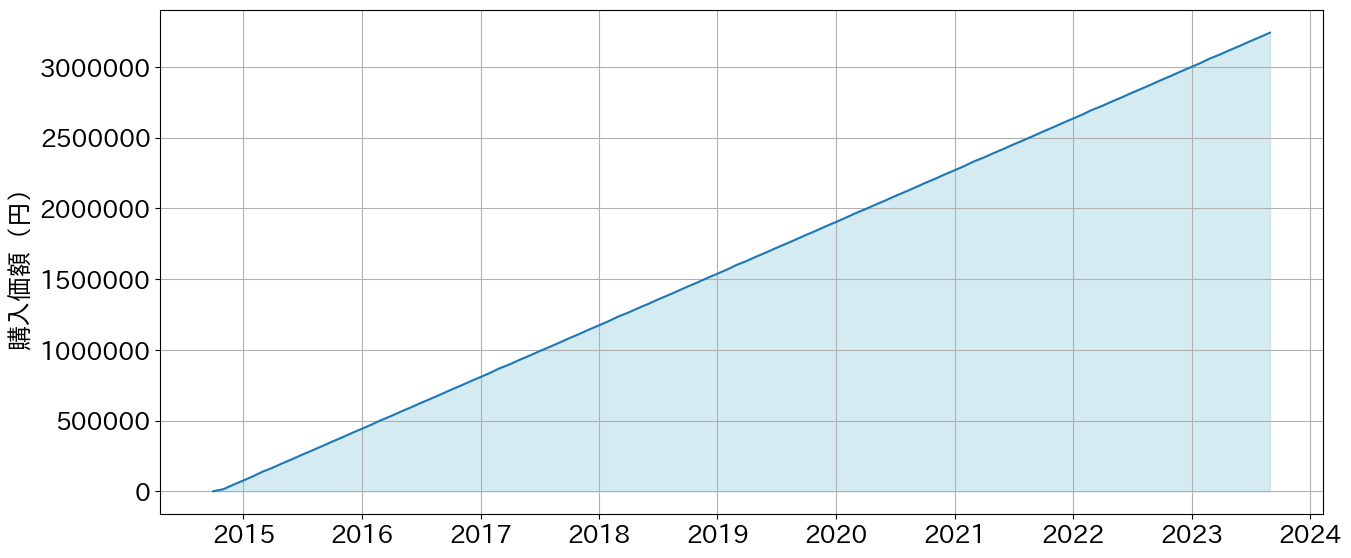

In [8]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(211)
fig.subplots_adjust(top=0.85)
ax.grid()
#ax.set_yticks(np.arange(-1000000, 10000000, 1000000))
ax.set_ylabel("購入価額（円）", fontsize=18)
plt.ticklabel_format(style='plain')
plt.tick_params(labelsize=18)
ax.fill_between(data.Purchase.index, data.Purchase, color="lightblue", alpha=0.5)
plt.plot(data.Purchase)
plt.show()

# 購入単価の推移

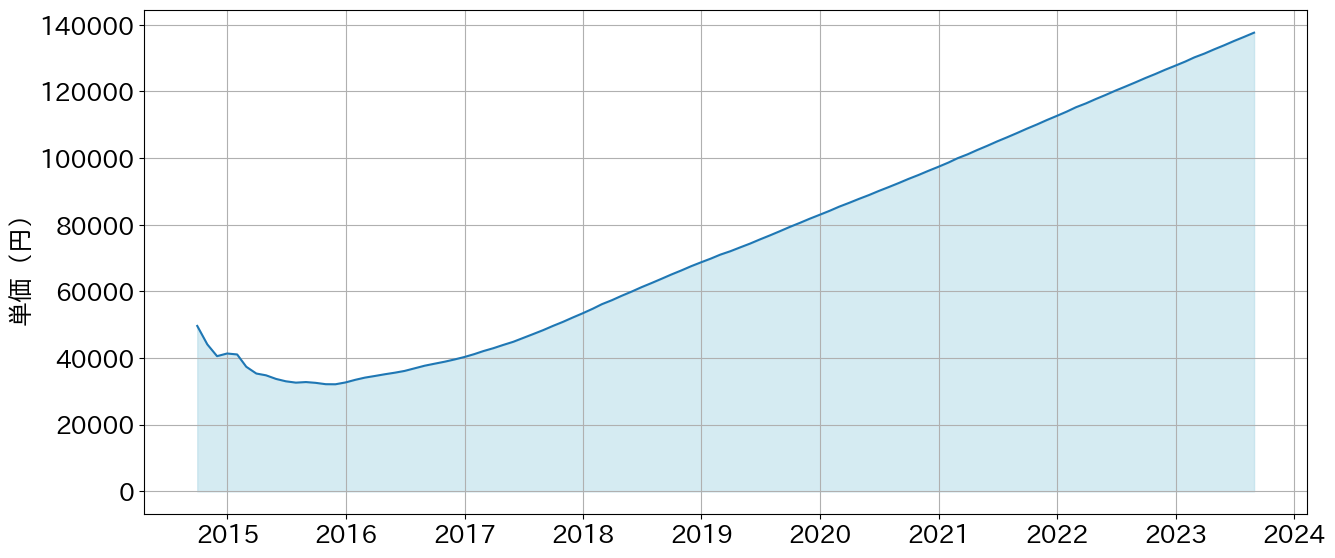

In [9]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(211)
fig.subplots_adjust(top=0.85)
ax.grid()
#ax.set_yticks(np.arange(-1000000, 10000000, 1000000))
ax.set_ylabel("単価（円）", fontsize=18)
plt.ticklabel_format(style='plain')
plt.tick_params(labelsize=18)
ax.fill_between(data.UnitPrice.index, data.UnitPrice, color="lightblue", alpha=0.5)
plt.plot(data.UnitPrice)
plt.show()

# 購入単価とビットコイン価格の推移

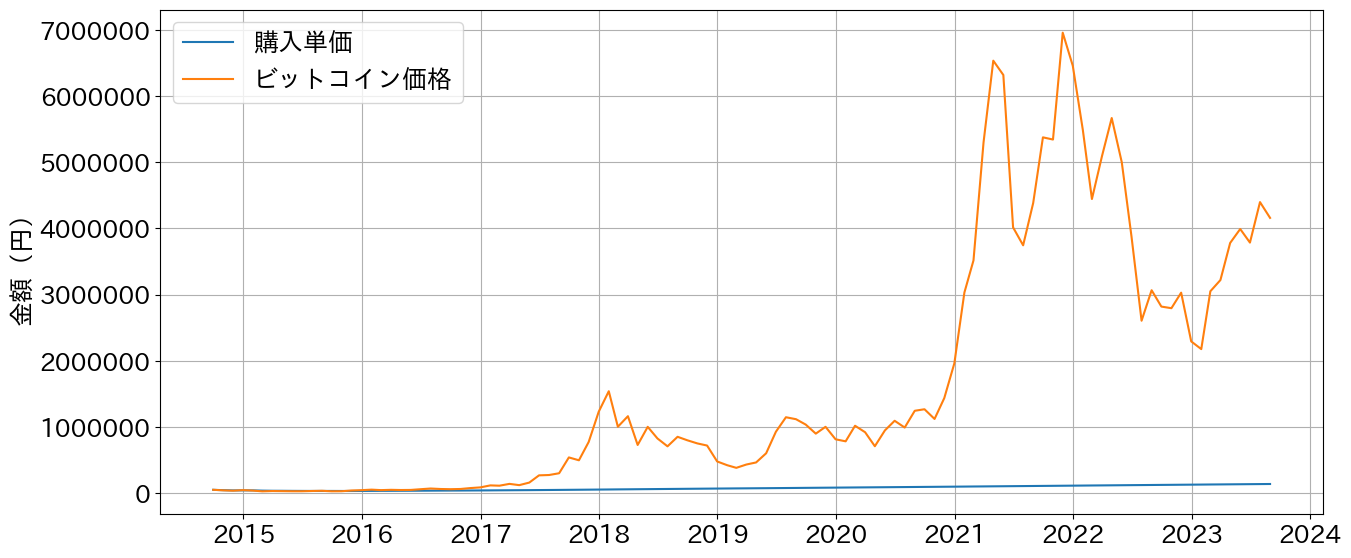

In [10]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(211)
fig.subplots_adjust(top=0.85)
ax.grid()
#ax.set_yticks(np.arange(-1000000, 10000000, 1000000))
ax.set_ylabel("金額（円）", fontsize=18)
plt.ticklabel_format(style='plain')
plt.tick_params(labelsize=18)
plt.plot(data.UnitPrice, label="購入単価")
plt.plot(data.Price, label="ビットコイン価格")
plt.legend(fontsize=18)
plt.show()

# 評価額と購入価額の推移

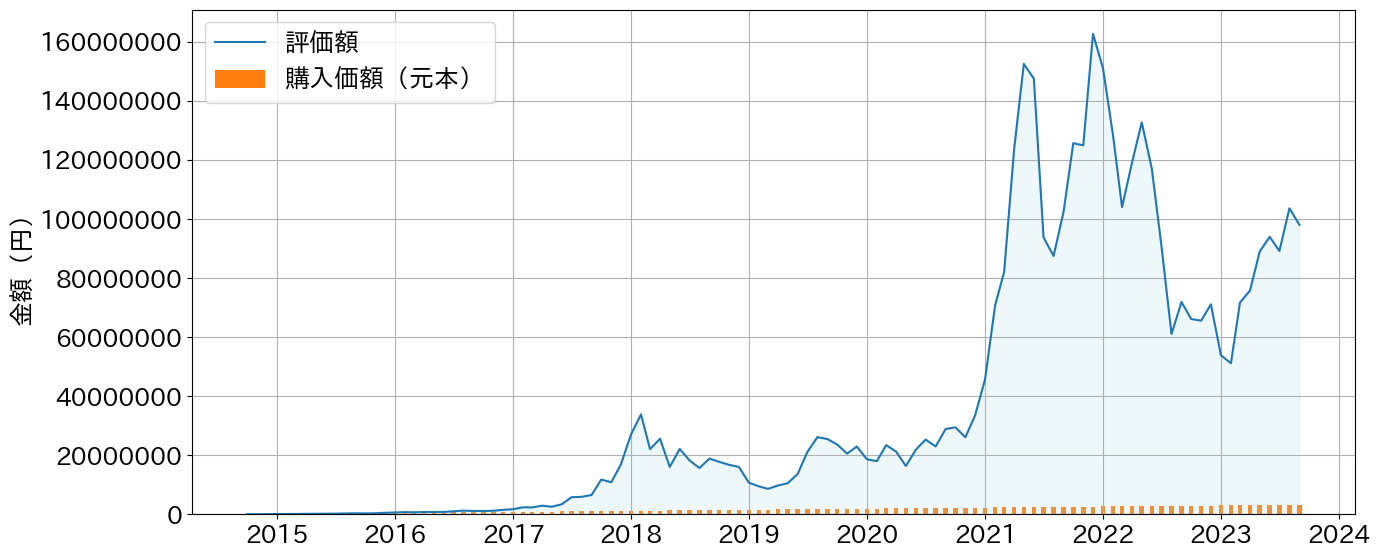

In [11]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(211)
fig.subplots_adjust(top=0.85)
ax.grid()
#ax.set_yticks(np.arange(-1000000, 10000000, 1000000))
ax.set_ylabel("金額（円）", fontsize=18)
plt.ticklabel_format(style='plain')
plt.tick_params(labelsize=18)
plt.bar(data.Purchase.index, data.Purchase, label="購入価額（元本）", width=14.0, color='tab:orange')
ax.fill_between(data.Valuation.index, data.Valuation, color="lightblue", alpha=0.2)
plt.plot(data.Valuation, label="評価額")
plt.legend(fontsize=18)
plt.show()